<hr/>

# Data Mining
**Tamás Budavári** - budavari@jhu.edu <br/>
**Class 8** 

- Bayesian inference
- Prior: proper vs improper
- Likelihood function
- Maximum Likelihood Estimation
- Links to least squares

<hr/>

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


<h1><font color="darkblue">Bayesian Inference</font></h1>
<hr/>

### Joint & Conditional Probability
- Consider random variables $X$, $Y$ of events. Their [**joint probability**](https://en.wikipedia.org/wiki/Joint_probability_distribution) is

>$\displaystyle P(X, Y) \neq P(X)\,P(Y)$ 
>
> instead
>
>$\displaystyle P(X, Y) = P(X)\,P(Y \lvert X)$ 
>
> where $P(Y  \lvert X)$ is the [**conditional probability**](https://en.wikipedia.org/wiki/Conditional_probability) of $Y$ given $X$

- For example, if $X$ represents the event of flipping head and $Y$ is tail on the same trial, $P(X,Y)=0$ because $P(Y \lvert  X)=0$. i.e. We can't have head and tail on the same one trial. 

- But on separate trials, the events would be independent and we would have $P(Y \lvert  X)=P(Y)$. i.e. The probability of flipping tail is not effected by the result of previous trails.


### Bayes' Theorem
- The joint probability of $X$ and $Y$ discrete events

>$\displaystyle P(X,Y) = P(X)\,P(Y \lvert X)$ 
>
> and 
>
>$\displaystyle P(Y,X) = P(Y)\,P(X \lvert Y)$ 
>
> Their equality yields [Bayes' theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) as
>
>$\displaystyle P(X \lvert Y) = \frac{P(X)\,P(Y \lvert X)}{P(Y)}$ 
>
> This is because
>
> $\displaystyle P(X)\,P(Y \lvert X) = P(X,Y) = P(Y,X) = P(Y)\,P(X \lvert Y) \qquad $ i.e. $ \qquad \displaystyle P(X)\,P(Y \lvert X) = P(Y)\,P(X \lvert Y) $


### Probability Densities
- It is also true on the continous case and PDFs

>$\displaystyle P(X \lvert y) = \frac{P(X)\,p(y \lvert X)}{p(y)}$ 
>
> and
>
>$\displaystyle p(x \lvert Y) = \frac{p(x)\,P(Y \lvert x)}{P(Y)}$ 
>

- Also

>$\displaystyle p(x \lvert y) = \frac{p(x)\,p(y \lvert x)}{p(y)}$ 
>
> where
>
>$\displaystyle p(y) = \int p(x)\,p(y \lvert x)\,dx$ 
>
> to ensure that
>
>$\displaystyle \int p(x \lvert y)\,dx = 1$ 

### Probabilitistic Model
- From data $D$ we can **infer** the parameters $\theta$ of model $M$ 

>$\displaystyle p(\theta \lvert D) = \frac{p(\theta)\,p(D \lvert \theta)}{p(D)}$ 
>
> or including the model $M$ explicitly
>
>$\displaystyle p(\theta \lvert D,M) = \frac{p(\theta \lvert M)\,p(D \lvert \theta,M)}{p(D \lvert M)}$ 



### Likelihood Function
- From data $D$ we can **infer** the parameters $\theta$ of model $M$ 

>$\displaystyle p(\theta \lvert D) = \frac{\pi(\theta)\,{\cal{}L}_D(\theta)}{Z}$ 
>
> where the normalization
>
>$\displaystyle Z = \int \pi(\theta)\,{\cal{}L}_D(\theta)\ d\theta $ 
>
> to ensure that
>
>$\displaystyle \int p(\theta \lvert D)\,d \theta = 1$ 

- The [**posterior**](https://en.wikipedia.org/wiki/Posterior_probability) is proportional to the [**prior**](https://en.wikipedia.org/wiki/Prior_probability) times the [**likelihood function**](https://en.wikipedia.org/wiki/Likelihood_function) as $ Z $ is all the same.

### Data
- A set of independent measurements

>$\displaystyle D = \Big\{x_i\Big\}_{i=1}^N$

- E.g., measuring the temperature in $N$ cities

### Model Parameterization

- For example, the model is that all cities have the same temperature

> We also need to state our prior knowledge about the temperature

- Let $\mu$ represent that temperature in all cities (same for all)

> We pick an appropriate prior - often people say we use a "flat" prior because we don't know...

### Alternative Parameterization

- We could have chosen another parametrization, say $\tan \phi$ with $\phi \in \left(-\frac{\pi}{2},\frac{\pi}{2} \right)$

> Clearly a "flat prior" means something different!


> What should be the prior? Needs careful consideration!

- Non-informative prior?

> For more, see [Jeffreys prior](https://en.wikipedia.org/wiki/Jeffreys_prior)

### What is the likelihood function?

- For a set of independent measurements

>$\displaystyle {\cal L}_D(\mu) = p(D \lvert \mu) = p(\{x_i\!\}\lvert\mu) = \prod_{i=1}^N p(x_i\lvert\mu) = \prod_{i=1}^N \ell_{i}(\mu)$

- For example, Gaussian uncertainties

>$\displaystyle \ell_{i}(\mu) = \frac{1}{\sqrt{2\pi\sigma_i^2}}\ \exp\left\{-\frac{(x_i-\mu)^2}{2\sigma_i^2}\right\}$



### Detour: Improper Priors

- The posterior PDF is

>$\displaystyle p(\mu|D) = \frac{\pi(\mu) \prod {\ell}_i(\mu)}{\int \pi(\mu) \prod {\ell}_i(\mu)\,d\mu}\ $ 

- Uniform prior?

> Using $\pi(\mu)\!=\!1$ is clearly wrong but what if the prior is flat over the interval where likelihood function is non-zero (if!), the normalization cancels from the ratio


### Estimation

- Expected value

>$\displaystyle \int \mu\, p(\mu \lvert D)\, d\mu$

- Variance: 2nd [central moment](https://en.wikipedia.org/wiki/Central_moment)




### Maximum Likelihood Estimation

- Maximizing ${\cal{}L}$ is the same as minimizing $-\log{\cal{}L}$ 

> $\displaystyle -\log{\cal{}L(\mu)} = \mathrm{const.} + \sum_{i=1}^N \frac{(x_i\!-\!\mu)^2}{2\sigma_i^2}$
>
> This is because for gaussian (c.f. [here](#What-is-the-likelihood-function?))
>
> $\displaystyle -\log{\cal{}L(\mu)} = -\log{ \left[ \prod_{i=1}^{N} p(x_i|\mu) \right]} = -\log{\left[ \prod_{i=1}^{N} \frac{1}{\sqrt{2 \pi \sigma_i^2}} \exp \left( -\frac{(x_i\! - \!\mu)^2}{2\sigma_i^2} \right) \right] } = - \sum_{i=1}^N \log{\left[ \frac{1}{\sqrt{2 \pi \sigma_i^2}} \exp \left( -\frac{(x_i\! - \!\mu)^2}{2\sigma_i^2} \right) \right] } $
> $\displaystyle \hspace{4em} = - \sum_{i=1}^N {\left[ \log \frac{1}{\sqrt{2 \pi \sigma_i^2}}  -\frac{(x_i\! - \!\mu)^2}{2\sigma_i^2} \right] } = \mathrm{const.} + \sum_{i=1}^N \frac{(x_i\!-\!\mu)^2}{2\sigma_i^2} $
> 

> Cf. the method of least squares




### Result

- Weighted average! Using $w_i = 1 \big/ \sigma_i^2$

> $\displaystyle \hat{\mu} = \frac{\sum w_i x_i}{\sum w_i}$

- Also variance!

>$\displaystyle \frac{1}{\sigma_{\mu}^2} = \sum w_i = \sum \frac{1}{\sigma_i^2}$

> If all have the same $\sigma$, we have

>$\displaystyle \frac{1}{\sigma_{\mu}^2} = \frac{N}{\sigma^2}$
$\ \ \ \rightarrow\ \ \ \
\displaystyle \sigma_{\mu} = {\sigma} \big/{\sqrt{N}}$



### Exercise: your 1st classification problem 

> Among some observed objects 1% belongs to a special type, e.g., quasars mixed with many stars. Using a classification method 99% of these special objects can be correctly selected. This method also selects 0.5% of the other types of objects erroneously.

> What is the probability of having a special type if an object is selected by the method?

> Hint: [Bayes' theorem](#Bayes'-Theorem)


<h1><font color="darkblue">scikit-learn in Python</font></h1>
<hr/>

### [Tutorial](http://scikit-learn.org/stable/tutorial/index.html)

- <font color="red">**NOTE**: </font> Again it is always a good practice to try to implement the methods you learnt yourself, which could also help you understand how different methods could work and custmize it based on the real problems you want to solve. But you might also want to be familar enough with `scikit-learn` in `Python`, which could be a powerful tool for data-mining/machine-learning. For example, you could use `scikit-learn` to check the output of your own codes or to implement and compare results of different methods quickly.

### [Datasets](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

In [7]:
from sklearn import datasets

- **Loaders**

In [8]:
digits = datasets.load_digits()

In [9]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [10]:
digits.images[0]  # 8 x 8 matrix

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

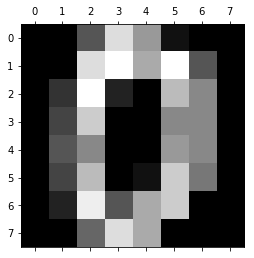

In [11]:
matshow(digits.images[0], cmap='gray');

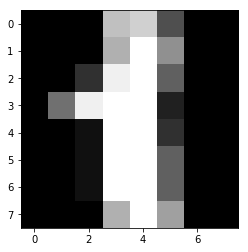

In [12]:
imshow(digits.images[1], cmap='gray');

In [13]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [14]:
# Features
digits.data.shape

(1797, 64)

In [15]:
# Label
digits.target.shape

(1797,)

- **Samples generator**

In [16]:
X, y = datasets.make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=3, random_state=2018)

In [17]:
X.shape

(1000, 10)

In [18]:
y.shape

(1000,)

In [19]:
X, y = datasets.make_circles(n_samples=1000, shuffle=True, noise=0.1, factor=0.2, random_state=2018)

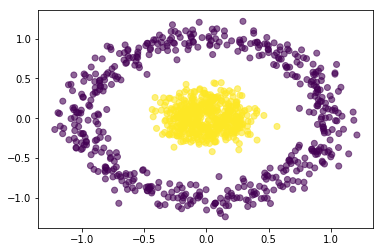

In [20]:
scatter(X[:,0], X[:,1], c=y, alpha=0.6); # alpha: 0.0 transparent through 1.0 opaque

### [Split Training Data and Test Data](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
Y = np.arange(10)
Y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
X = np.arange(20).reshape(10, 2)
X

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19]])

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2018)
print('X_train: \n', X_train)
print('X_test: \n', X_test)
print('Y_train: \n', Y_train)
print('Y_test: \n', Y_test)

X_train: 
 [[16 17]
 [18 19]
 [ 8  9]
 [10 11]
 [ 2  3]
 [ 4  5]
 [12 13]]
X_test: 
 [[ 0  1]
 [ 6  7]
 [14 15]]
Y_train: 
 [8 9 4 5 1 2 6]
Y_test: 
 [0 3 7]


In [25]:
# If you don't want to shuffle
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2018, shuffle=False)
print('X_train: \n', X_train)
print('X_test: \n', X_test)
print('Y_train: \n', Y_train)
print('Y_test: \n', Y_test)

X_train: 
 [[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]]
X_test: 
 [[14 15]
 [16 17]
 [18 19]]
Y_train: 
 [0 1 2 3 4 5 6]
Y_test: 
 [7 8 9]


### [Cross-Validation](http://scikit-learn.org/stable/modules/cross_validation.html)

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
wine = datasets.load_wine()

In [28]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [29]:
# Features
wine.data.shape

(178, 13)

In [30]:
# Label
wine.target.shape

(178,)

In [31]:
# How many class and how many observation in each class
np.unique(wine.target, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

In [32]:
from sklearn import neighbors

In [33]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
cvscores = cross_val_score(estimator=knn, X=wine.data, y=wine.target, cv=10)
print(cvscores)

[ 0.68421053  0.55555556  0.72222222  0.66666667  0.66666667  0.66666667
  0.72222222  0.77777778  0.88235294  0.875     ]


In [34]:
mean(cvscores)

0.72193412452700367

In [35]:
# Alternatively

# Split dataset into k consecutive folds (without shuffling by default).
from sklearn.model_selection import KFold

# The folds are made by preserving the percentage of samples for each class
from sklearn.model_selection import StratifiedKFold 

In [36]:
wine.data.shape

(178, 13)

In [37]:
wine.target.shape

(178,)

In [38]:
skf = StratifiedKFold(n_splits=2, shuffle=False, random_state=2018) # random_state used when shuffle == True.
for fold1_index, fold2_index in skf.split(wine.data, wine.target):
    print('Fold1:', fold1_index)
    print('Fold2:', fold2_index)
    print('\n')

Fold1: [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
Fold2: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153]


Fold1: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  

In [39]:
# The distribution of each class in each folds
y_fold1 = wine.target[fold1_index]
y_fold2 = wine.target[fold2_index]
print('Fold1:')
print(np.unique(y_fold1, return_counts=True))
print('Fold2:')
print(np.unique(y_fold2, return_counts=True))

Fold1:
(array([0, 1, 2]), array([30, 36, 24]))
Fold2:
(array([0, 1, 2]), array([29, 35, 24]))


In [40]:
kf = KFold(n_splits=2, shuffle=True, random_state=2018) # random_state used when shuffle == True.
for fold1_index, fold2_index in kf.split(wine.data, wine.target):
    print('Fold1:', fold1_index)
    print('Fold2:', fold2_index)
    print('\n')

Fold1: [  0   4   6   9  16  19  22  25  26  27  29  31  34  38  40  42  43  44
  45  46  47  49  50  55  59  60  61  65  67  70  71  72  73  74  75  76
  77  79  83  86  87  88  93  96  97  98  99 100 102 103 104 105 109 113
 114 117 119 120 122 123 126 127 128 130 134 135 137 141 142 145 147 148
 149 150 151 152 153 154 156 157 159 160 163 164 170 171 172 175 177]
Fold2: [  1   2   3   5   7   8  10  11  12  13  14  15  17  18  20  21  23  24
  28  30  32  33  35  36  37  39  41  48  51  52  53  54  56  57  58  62
  63  64  66  68  69  78  80  81  82  84  85  89  90  91  92  94  95 101
 106 107 108 110 111 112 115 116 118 121 124 125 129 131 132 133 136 138
 139 140 143 144 146 155 158 161 162 165 166 167 168 169 173 174 176]


Fold1: [  1   2   3   5   7   8  10  11  12  13  14  15  17  18  20  21  23  24
  28  30  32  33  35  36  37  39  41  48  51  52  53  54  56  57  58  62
  63  64  66  68  69  78  80  81  82  84  85  89  90  91  92  94  95 101
 106 107 108 110 111 112 115 116 1

In [41]:
# The distribution of each class in each folds
y_fold1 = wine.target[fold1_index]
y_fold2 = wine.target[fold2_index]
print('Fold1:')
print(np.unique(y_fold1, return_counts=True))
print('Fold2:')
print(np.unique(y_fold2, return_counts=True))

Fold1:
(array([0, 1, 2]), array([35, 32, 22]))
Fold2:
(array([0, 1, 2]), array([24, 39, 26]))


- <font color="red">**NOTE**: </font> Be careful of the unbalanced when split the data